In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("general_data.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Filling Missing Values

In [6]:
df.NumCompaniesWorked.isna().sum()

19

In [7]:
df.NumCompaniesWorked=df.NumCompaniesWorked.fillna(df.NumCompaniesWorked.mean())
df.NumCompaniesWorked.isna().sum()

0

In [8]:
df.TotalWorkingYears.isna().sum()

9

In [9]:
df.TotalWorkingYears=df.TotalWorkingYears.fillna(df.TotalWorkingYears.mean())
df.TotalWorkingYears.isna().sum()

0

# Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df["Attrition"]= le.fit_transform(df.Attrition)
df["BusinessTravel"]= le.fit_transform(df.BusinessTravel)
df["Department"]= le.fit_transform(df.Department)
df["EducationField"]= le.fit_transform(df.EducationField)
df["Gender"]= le.fit_transform(df.Gender)
df["JobRole"]= le.fit_transform(df.JobRole)
df["MaritalStatus"]= le.fit_transform(df.MaritalStatus)
df["Over18"]= le.fit_transform(df.Over18)

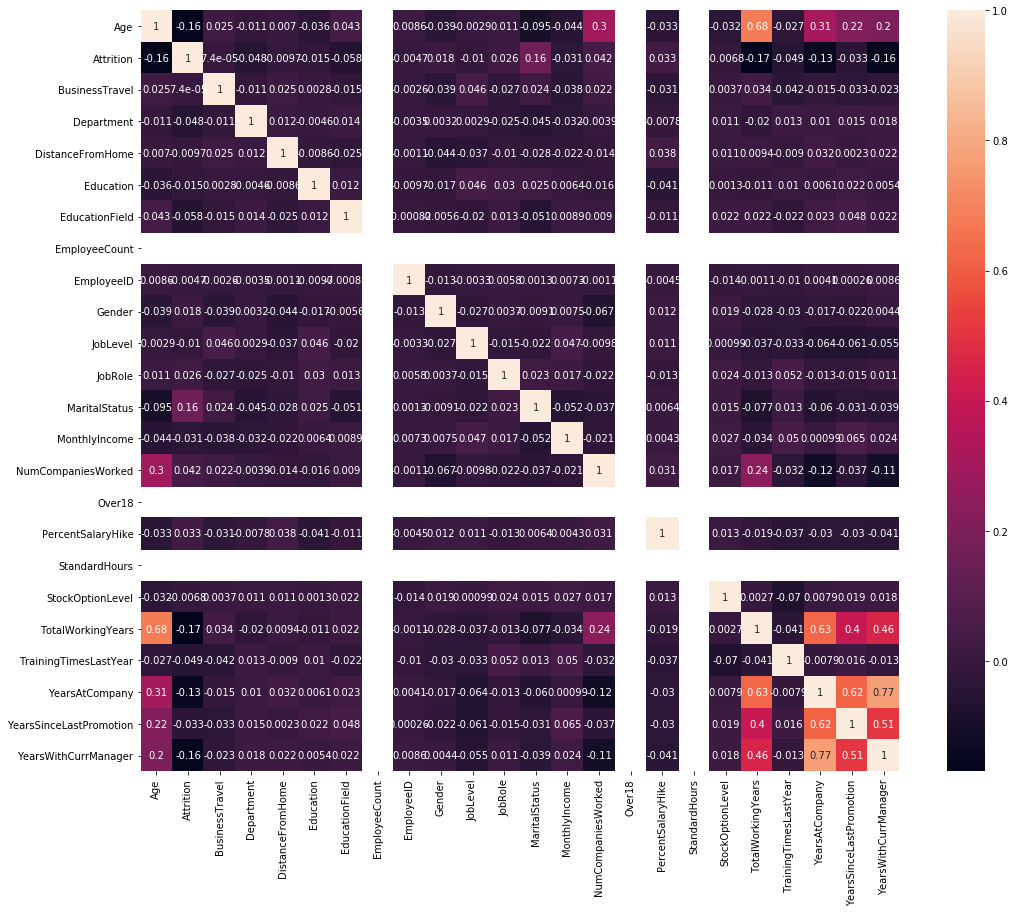

In [13]:
fig, ax = plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(),annot=True,ax=ax)

# X and Y Variables

In [14]:
X = df.drop(["EmployeeID","Attrition","EmployeeCount","Over18","StandardHours"],axis=1)
Y = df["Attrition"]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null int64
BusinessTravel             4410 non-null int64
Department                 4410 non-null int64
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null int64
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null int64
JobLevel                   4410 non-null int64
JobRole                    4410 non-null int64
MaritalStatus              4410 non-null int64
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
Over18                     4410 non-null int64
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-null int6

In [17]:
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [18]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

# Train and Test Spliting

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

# Model Building Using Sklearn

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lm1 = LogisticRegression()

lm1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Score of Model (Using Test Data (ie. the Unseen Data))

In [22]:
lm1.score(x_test,y_test)

0.8518518518518519

# Alternate Method Using StatsModel.api

In [24]:
import statsmodels.api as sm

In [25]:
x1= sm.add_constant(x_train)

logistic = sm.Logit(y_train,x1)

result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.397050
         Iterations 7


In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3087
Model:                          Logit   Df Residuals:                     3067
Method:                           MLE   Df Model:                           19
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.1193
Time:                        14:54:51   Log-Likelihood:                -1225.7
converged:                       True   LL-Null:                       -1391.7
                                        LLR p-value:                 5.335e-59
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3515      0.489      0.719      0.472      -0.607       1.310
Age                        -0.0319      0.008     -3.949      0.000      -0.048      -0.016
BusinessTravel              0.0215      0.079      0.273      0.785      -0.133       0.176
Department                 -0.2628      0.096     -2.750      0.006      -0.450      -0.076
DistanceFromHome           -0.0001      0.006     -0.017      0.987      -0.013       0.012
Education                  -0.0665      0.051     -1.299      0.194      -0.167       0.034
EducationField             -0.0834      0.039     -2.117      0.034      -0.161      -0.006
Gender                      0.1133      0.106      1.065      0.287      -0.095       0.322
JobLevel                   -0.0242      0.047     -0.515      0.607      -0.116       0.068
JobRole                     0.0318      0.021      1.502      0.133      -0.010       0.073
MaritalStatus               0.6338      0.076      8.362      0.000       0.485       0.782
MonthlyIncome           -1.739e-06   1.13e-06     -1.535      0.125   -3.96e-06    4.81e-07
NumCompaniesWorked          0.1117      0.022      5.114      0.000       0.069       0.155
PercentSalaryHike       -6.779e-05      0.014     -0.005      0.996      -0.028       0.027
StockOptionLevel           -0.1274      0.062     -2.042      0.041      -0.250      -0.005
TotalWorkingYears          -0.0617      0.014     -4.341      0.000      -0.090      -0.034
TrainingTimesLastYear      -0.1726      0.042     -4.087      0.000      -0.255      -0.090
YearsAtCompany             -0.0136      0.023     -0.596      0.551      -0.058       0.031
YearsSinceLastPromotion     0.1659      0.025      6.746      0.000       0.118       0.214
YearsWithCurrManager       -0.1125      0.027     -4.155      0.000      -0.166      -0.059
===========================================================================================
"""